In [1]:
#importação biblioteca Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#importação biblioteca Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#Divisão das bases para treinamento e para teste
from sklearn.model_selection import train_test_split

In [5]:
titanic = pd.read_csv('titanic.csv')

In [6]:
titanic

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,N,3,male,22.000000,1,0,7.2500,S
1,2,Y,1,female,38.000000,1,0,71.2833,C
2,3,Y,3,female,26.000000,0,0,7.9250,S
3,4,Y,1,female,35.000000,1,0,53.1000,S
4,5,N,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,N,2,male,27.000000,0,0,13.0000,S
887,888,Y,1,female,19.000000,0,0,30.0000,S
888,889,N,3,female,29.699118,1,2,23.4500,S
889,890,Y,1,male,26.000000,0,0,30.0000,C


In [37]:
x_titanic = titanic.iloc[:, 2:9].values

In [15]:
x_titanic

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.6991176470588, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [17]:
#*Padronizar as variaveis preditoras

labelencoder = LabelEncoder()
x_titanic[:,1] = labelencoder.fit_transform(x_titanic[:,1])
x_titanic[:,2] = labelencoder.fit_transform(x_titanic[:,2])
x_titanic[:,3] = labelencoder.fit_transform(x_titanic[:,3])
x_titanic[:,4] = labelencoder.fit_transform(x_titanic[:,4])
x_titanic[:,5] = labelencoder.fit_transform(x_titanic[:,5])
x_titanic[:,6] = labelencoder.fit_transform(x_titanic[:,6])



In [18]:
x_titanic

array([[3, 1, 28, ..., 0, 18, 2],
       [1, 0, 52, ..., 0, 207, 0],
       [3, 0, 34, ..., 0, 41, 2],
       ...,
       [3, 0, 39, ..., 2, 131, 2],
       [1, 1, 34, ..., 0, 153, 0],
       [3, 1, 43, ..., 0, 30, 1]], dtype=object)

In [19]:
y_titanic = titanic.iloc[:,1:2].values

In [20]:
y_titanic

array([['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
      

In [21]:
x_titanic_treinamento, x_titanic_teste, y_titanic_treinamento, y_titanic_teste = train_test_split(x_titanic, y_titanic, test_size = 0.25, random_state=0)

In [22]:
arvore_titanic = DecisionTreeClassifier(criterion ='entropy')
arvore_titanic .fit( x_titanic_treinamento, y_titanic_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#Este código retorna a importancia de ganho de informação de cada variavel x(preditoras)
arvore_titanic.feature_importances_

array([0.07268762, 0.24218299, 0.26436328, 0.05709882, 0.03279596,
       0.31716352, 0.01370781])

In [24]:
from matplotlib import pyplot as plt

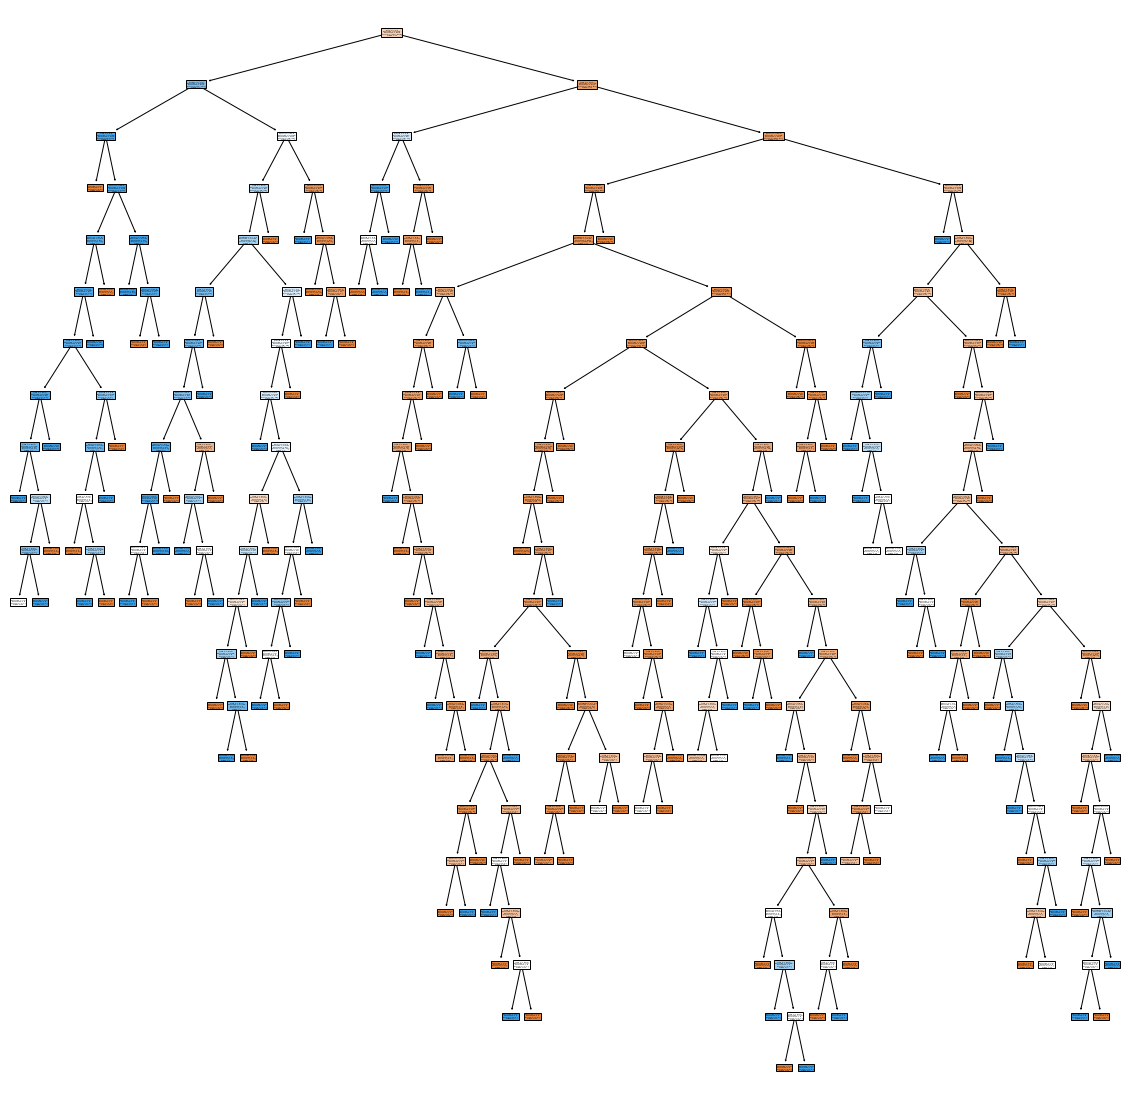

In [25]:
#Gerar a visualização da árvore de decisão (Formato de texto)
from sklearn import tree
#colocar o nome dos atributos na árvore para ficar mais fácil a compreensão
previsores = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']
#aumentar o tamanho da arvore de decisão
figura, eixos = plt.subplots (nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_titanic, feature_names=previsores, class_names=arvore_titanic.classes_, filled=True);

In [30]:
previsoes = arvore_titanic.predict(x_titanic_teste)
previsoes

array(['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
accuracy_score(y_titanic_teste, previsoes)

0.7488789237668162

In [35]:
from yellowbrick.classifier import ConfusionMatrix

0.7488789237668162

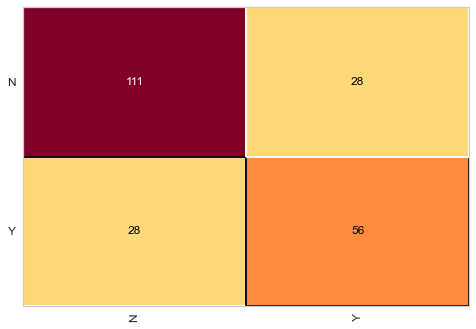

In [36]:
cm = ConfusionMatrix(arvore_titanic)
cm.fit(x_titanic_treinamento, y_titanic_treinamento)
cm.score(x_titanic_teste, y_titanic_teste)